# Offshore Wind Farming
## Objective and Prerequisites

In this example, we will solve the problem of how to minimize the cost of laying underwater cables to collect electricity produced by an offshore wind farm. We will construct a mixed-integer programming (MIP)  model of this problem, implement this model in the Gurobi Python interface, and compute an optimal solution.

We will also investigate the use of lazy constraints and where they can help (and where they cannot).

## Motivation

Global climate change has already had observable effects on the environment. Glaciers have shrunk, ice on rivers and lakes is breaking up earlier than expected, plant and animal species have  been affected and trees are flowering sooner than expected. The potential future effects of global climate change include more frequent wildfires, longer periods of drought in some regions and an increase in the number, duration and intensity of tropical storms. [1]

Climate change mitigation consists of actions to limit the magnitude or rate of global warming and its related effects.
The first challenge for climate change mitigation is eliminating the burning of coal, oil and, eventually, natural gas. This is perhaps the most daunting challenge as denizens of richer nations literally eat, wear, work, play and even sleep on the products made from fossil fuels. Also, citizens of developing nations want and arguably deserve the same comforts. There are no perfect solutions for reducing dependence on fossil fuels (for example, carbon neutral biofuels can drive up the price of food and lead to forest destruction, and while nuclear power does not emit greenhouse gases, it does produce radioactive waste). Other alternatives include plant-derived plastics, biodiesel, and wind power. [2]

Offshore wind power is the use of wind farms constructed in bodies of water, usually in the ocean, to harvest wind energy to generate electricity. Higher wind speeds are available offshore compared to on land, so offshore wind power’s electricity generation is higher per amount of capacity installed. 

The advantage of locating wind turbines offshore is that the wind is much stronger off the coasts, and unlike wind over the continent, offshore breezes can be strong in the afternoon, matching the time when people are using the most electricity. Offshore turbines can also be located close to the load centers along the coasts, such as large cities, eliminating the need for new long-distance transmission lines.

## Problem Description

An offshore wind farm is a collection of wind turbines placed at sea to take advantage of the strong offshore winds. These strong winds produce more electricity, but offshore wind farms are more expensive to install and operate than those on land.

We will use a MIP model to reduce part of the cost of building an offshore wind farm. We will compute a plan for how to lay the underwater cables that connect the turbines. These cables are necessary to transfer the power produced by the turbines to land. The plan we compute will minimize the cost to install the underwater cables, while ensuring that each turbine is connected to the shore and each cable has sufficient capacity to handle the electrical current generated.

The goal of this optimization problem is to decide which cables should be laid to connect the wind farm power network at a minimum cost.

The model of offshore wind farming optimization problem is an instance of a more general optimization model known as fixed charge network flow problem. Fixed charge network flow problems can be applied to a large number of business problems -for example, in the planning of communication and transport networks.

## Data input

In [1]:
import numpy as np
import pandas as pd
from dataclasses import dataclass
import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
from shapely.geometry import LineString

# Read in the data
df = pd.read_excel('offshore.xlsx')
price_per_km = 1e6
capacity = 65 # Amount of MW that a cable can carry
produced = 8

# Set index
df.set_index('Name',inplace=True)
names = df.index

# Define connections
connections = [(o, d) for o in names for d in names if o != d and o != 'Plat']

# Calculate distances
distances = {(o,d): np.sqrt((df.loc[o, 'Easting'] - df.loc[d, 'Easting'])**2 + 
                     (df.loc[o, 'Northing'] - df.loc[d, 'Northing'])**2) / 1000 # Convert to km
            for (o,d) in connections}

# Check if crossing
def check_if_crossing(df, o1, d1, o2, d2):
    line1 = LineString([(df.loc[o1, 'Easting'], df.loc[o1, 'Northing']), 
                        (df.loc[d1, 'Easting'], df.loc[d1, 'Northing'])])
    line2 = LineString([(df.loc[o2, 'Easting'], df.loc[o2, 'Northing']), 
                        (df.loc[d2, 'Easting'], df.loc[d2, 'Northing'])])
    
    if o1 in [o2, d2] or d1 in [o2, d2]:
        return False
    return line1.crosses(line2)


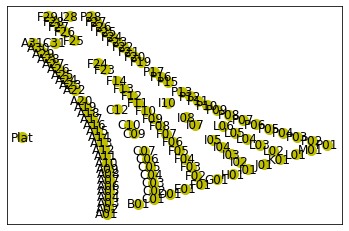

In [2]:
# Define the positions
pos = {n : (df.loc[n, 'Easting'], df.loc[n, 'Northing']) for n in names}

# Draw the units only ones
H = nx.Graph()
H.add_nodes_from([n for n in names])
nx.draw_networkx_nodes(H, pos, node_size = 100, node_color='y')
nx.draw_networkx_labels(H, pos);
plt.rcParams["figure.figsize"] = (200,100)

In [ ]:
# Here goes the model

In [ ]:
# Draw the edges that actually exist
G = nx.Graph()
G.add_edges_from([(i, j) for (i,j) in connections if x[i,j].x > 0.5])
nx.draw_networkx(G, pos, node_size = 100, node_color='y')
nx.draw_networkx_labels(H, pos);
plt.rcParams["figure.figsize"] = (200,100)